In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [9]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df = df[['v1','v2']]

In [12]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [13]:
df.rename(columns={'v1':'target','v2':'sample'},inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [16]:
df['target'].sample(5)

5257    0
2042    0
3835    0
3926    0
1740    1
Name: target, dtype: int32

In [17]:
df.duplicated().sum()
df = df.drop_duplicates(keep='first')

In [18]:
df.value_counts('target')

target
0    4516
1     653
dtype: int64

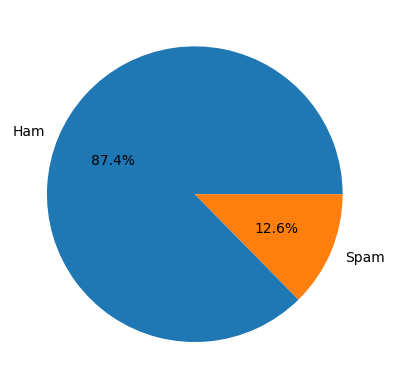

In [20]:
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],autopct="%1.1f%%")
plt.show()

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shuai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['characters'] = df['sample'].apply(len)

C:\Users\shuai\AppData\Local\Temp\ipykernel_7568\3353714276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['characters'] = df['sample'].apply(len)


In [27]:
df['words'] = df['sample'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\shuai\AppData\Local\Temp\ipykernel_7568\3549595627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words'] = df['sample'].apply(lambda x:len(nltk.word_tokenize(x)))


In [28]:
df['sentences'] = df['sample'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\shuai\AppData\Local\Temp\ipykernel_7568\4073320374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences'] = df['sample'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [29]:
df.sample(5)

,target,sample,characters,words,sentences
2660,0,Want to finally have lunch today?,33,7,1
1890,0,Ok but knackered. Just came home and went to s...,89,21,3
278,0,Just sent it. So what type of food do you like?,47,13,2
1035,0,"Hello baby, did you get back to your mom's ? A...",157,37,5
1977,1,Reply to win å£100 weekly! Where will the 2006...,104,23,3


In [30]:
df.describe()

,target,characters,words,sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [32]:
df[df['target'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
df[df['target'] == 1][['characters','words','sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot: xlabel='characters', ylabel='Count'>

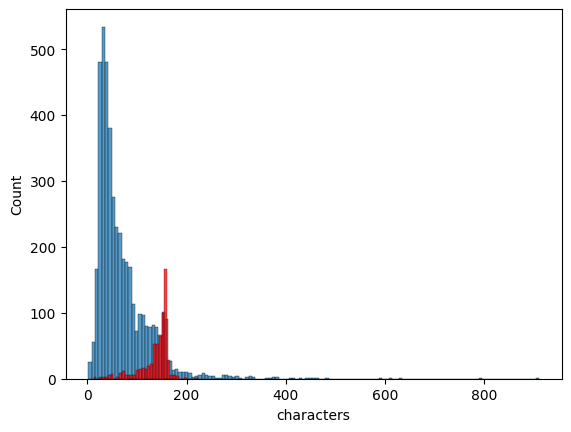

In [38]:
sns.histplot(df[df['target'] == 0]['characters'])
sns.histplot(df[df['target'] == 1]['characters'],color='red')

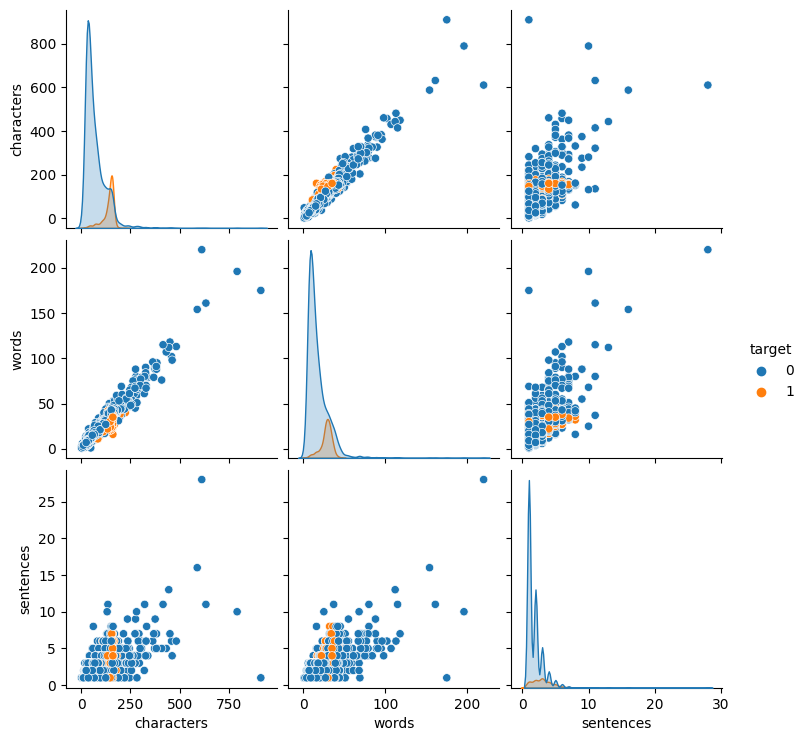

In [39]:
sns.pairplot(df,hue='target')

In [40]:
df.corr()

,target,characters,words,sentences
target,1.000000,0.384717,0.262984,0.284901
characters,0.384717,1.000000,0.965770,0.638143
words,0.262984,0.965770,1.000000,0.684541
sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot: >

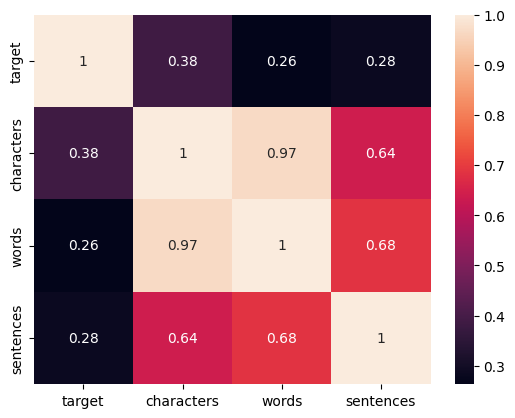

In [41]:
sns.heatmap(df.corr(),annot=True)

In [63]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [74]:
from nltk.stem.porter import PorterStemmer

In [77]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    # is used for cloning
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
    

In [43]:
transform_text('Hi how Are You')

'hi how are you'

In [44]:
nltk.word_tokenize("Hi how Are You")

['Hi', 'how', 'Are', 'You']

In [66]:
list = ['Hi','%','How','$']
for i in list:
    print(i.isalnum())

True
False
True
False


In [75]:
ps = PorterStemmer()

In [76]:
ps.stem("Dance")

'danc'

In [79]:
df['transformed_sample'] = df['sample'].apply(transform_text)

In [81]:
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 4.6 MB/s eta 0:00:00


In [86]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color='white')

In [89]:
spam_wc = wc.generate(df[df['target'] == 1]['sample'].str.cat(sep=" "))

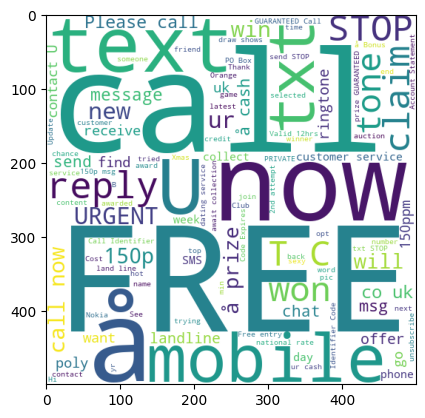

In [90]:
plt.imshow(spam_wc)

In [91]:
ham_wc = wc.generate(df[df['target'] == 0]['sample'].str.cat(sep=" "))

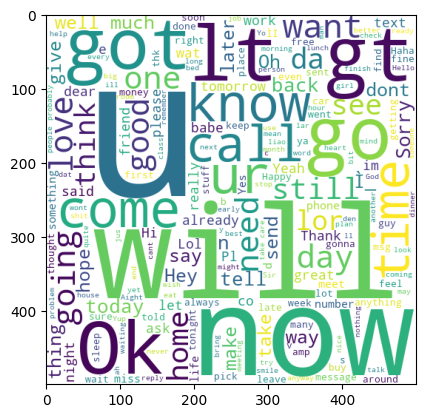

In [92]:
plt.imshow(ham_wc)

In [94]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_sample'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [95]:
len(spam_corpus)

9939

In [97]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

C:\Users\shuai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


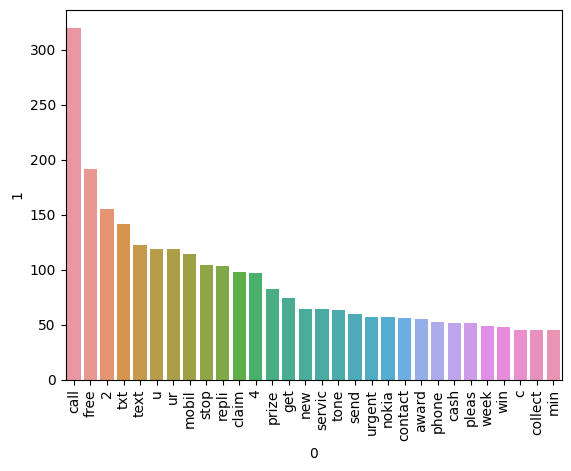

In [99]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [132]:
X = cv.fit_transform(df['transformed_sample']).toarray()

In [133]:
X.shape

(5169, 6708)

In [145]:
y = df['target']

In [144]:
tfid = TfidfVectorizer()
X = tfid.fit_transform(df['transformed_sample']).toarray()

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [147]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [148]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [149]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [150]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [151]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [152]:
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [130]:
import pickle

In [153]:
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('naive.pkl','wb'))